# Data Analysis and Visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
path = 'ER_Visits_2019-2022_cleaned.csv'
df = pd.read_csv(path, header = 0)
df

,Unnamed: 0,Gender,Age,Region,Diagnosis,2019,2020,2021,2022
0,0,Men,0 years,Region Hovedstaden,Infectious diseases,248.0,147.0,274.0,316.0
1,1,Men,0 years,Region Hovedstaden,Diseases of lung,322.0,225.0,387.0,377.0
2,2,Men,0 years,Region Hovedstaden,Diseases of the nervous system,47.0,76.0,43.0,70.0
3,3,Men,0 years,Region Hovedstaden,Diseases of the heart and great vessels,27.0,40.0,28.0,30.0
4,4,Men,0 years,Region Hovedstaden,"Diseases of arteries, veins, lymph",4.5,4.0,5.0,4.5
...,...,...,...,...,...,...,...,...,...
4554,4554,Women,85 years and over,Region Nordjylland,Sterilization,0.0,0.0,0.0,0.0
4555,4555,Women,85 years and over,Region Nordjylland,Concussion,3.0,5.0,8.0,13.0
4556,4556,Women,85 years and over,Region Nordjylland,Poisonings,7.0,5.0,7.0,9.0
4557,4557,Women,85 years and over,Region Nordjylland,Live-born children,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Region', 'Diagnosis', '2019', '2020',
       '2021', '2022'],
      dtype='object')

In [6]:
df = df.drop(columns = 'Unnamed: 0')
df

,Gender,Age,Region,Diagnosis,2019,2020,2021,2022
0,Men,0 years,Region Hovedstaden,Infectious diseases,248.0,147.0,274.0,316.0
1,Men,0 years,Region Hovedstaden,Diseases of lung,322.0,225.0,387.0,377.0
2,Men,0 years,Region Hovedstaden,Diseases of the nervous system,47.0,76.0,43.0,70.0
3,Men,0 years,Region Hovedstaden,Diseases of the heart and great vessels,27.0,40.0,28.0,30.0
4,Men,0 years,Region Hovedstaden,"Diseases of arteries, veins, lymph",4.5,4.0,5.0,4.5
...,...,...,...,...,...,...,...,...
4554,Women,85 years and over,Region Nordjylland,Sterilization,0.0,0.0,0.0,0.0
4555,Women,85 years and over,Region Nordjylland,Concussion,3.0,5.0,8.0,13.0
4556,Women,85 years and over,Region Nordjylland,Poisonings,7.0,5.0,7.0,9.0
4557,Women,85 years and over,Region Nordjylland,Live-born children,0.0,0.0,0.0,0.0


## Total Hospitalizations

First, I want to learn the most common reason why people go to the emergency room. I will find the total number of cases across all ages, genders, and regions for each diagnosis. I will create a column called "Total_Visits".

In [7]:
df_diagnoses_totals = df.groupby("Diagnosis")['2019', '2020', '2021', '2022'].sum().reset_index()

df_diagnoses_totals['Total_Visits']= df_diagnoses_totals.sum (axis = 1)

In [8]:
df_diagnoses_totals = df_diagnoses_totals.drop(index = 1, axis = 0)
df_diagnoses_totals

,Diagnosis,2019,2020,2021,2022,Total_Visits
0,Concussion,1472.000000,1526.166667,1580.000000,1574.166667,6152.333333
2,"Diseases of arteries, veins, lymph",3530.833333,3746.666667,3601.833333,3328.333333,14207.666667
3,Diseases of blood and lymphatic tissue,8058.500000,8405.000000,8261.000000,8203.833333,32928.333333
4,"Diseases of ear, nose and throat",7660.000000,6487.333333,6397.333333,9229.000000,29773.666667
5,Diseases of female genital organs,1847.833333,1993.000000,2021.000000,2005.166667,7867.000000
6,Diseases of lung,60826.000000,55813.000000,56735.000000,57716.000000,231090.000000
7,Diseases of mamma,541.166667,592.500000,614.000000,625.000000,2372.666667
8,"Diseases of pregnancy, delivery and the perina...",36557.333333,39880.000000,41155.000000,36663.000000,154255.333333
9,Diseases of the eye,1351.000000,1164.833333,1067.000000,985.166667,4568.000000
10,Diseases of the heart and great vessels,36663.000000,40283.166667,40377.500000,39614.000000,156937.666667


In [9]:
highest_values = df_diagnoses_totals['Total_Visits'].sort_values(ascending = False)
highest_values

20    351239.000000
14    259047.000000
6     231090.000000
19    185055.666667
11    170303.333333
10    156937.666667
8     154255.333333
18    131497.000000
17    130037.000000
15    115098.000000
12     99682.000000
16     63881.000000
3      32928.333333
4      29773.666667
13     29265.333333
21     19364.000000
2      14207.666667
5       7867.000000
0       6152.333333
9       4568.000000
7       2372.666667
23       206.333333
22         0.000000
Name: Total_Visits, dtype: float64

Now I will visualize the five diagnoises with highest number of visits.

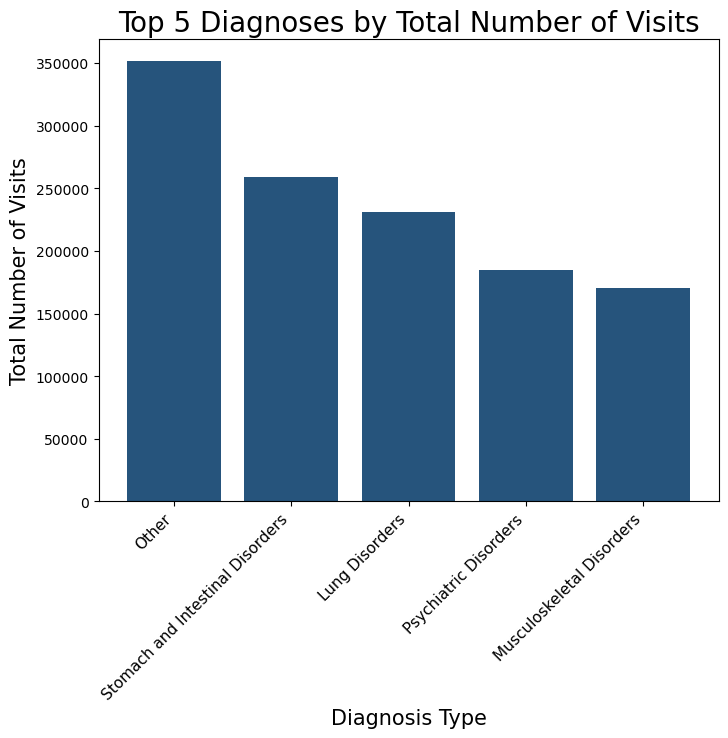

In [10]:
color = '#26547C'
plt.figure(figsize = (8,6))
ax = plt.axes()
top_diseases = highest_values.nlargest(5)
disease_names = ('Other', 'Stomach and Intestinal Disorders', 'Lung Disorders', 'Psychiatric Disorders','Musculoskeletal Disorders') 

plt.bar(disease_names, top_diseases, color = color, align = 'center')
plt.xlabel('Diagnosis Type', fontsize = 15)
plt.ylabel('Total Number of Visits', fontsize = 15)
plt.title('Top 5 Diagnoses by Total Number of Visits', fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45, ha = 'right')
plt.show()

In [11]:
grouped_diagnoses = df.groupby('Diagnosis').sum()

top_diagnoses_by_year = {}
years = ['2019', '2020', '2021', '2022']

for year in years:
    top_diagnoses = grouped_diagnoses[year].nlargest(6)
    top_diagnoses_by_year[year] = top_diagnoses

In [12]:
for year, diagnoses in top_diagnoses_by_year.items():
    print(f"Top 5 Diagnoses in {year}:")
    print(diagnoses)
    print()

Top 5 Diagnoses in 2019:
Diagnosis
Diagnosis, total                          506071.000000
Other diseases                             80493.000000
Diseases of the stomach and intestines     61648.000000
Diseases of lung                           60826.000000
Mental disorders                           43091.166667
Diseases of the musculoskeletal system     39633.333333
Name: 2019, dtype: float64

Top 5 Diagnoses in 2020:
Diagnosis
Diagnosis, total                          543154.0
Other diseases                             90929.0
Diseases of the stomach and intestines     66063.0
Diseases of lung                           55813.0
Mental disorders                           47125.5
Diseases of the musculoskeletal system     42110.0
Name: 2020, dtype: float64

Top 5 Diagnoses in 2021:
Diagnosis
Diagnosis, total                          553313.0
Other diseases                             91174.0
Diseases of the stomach and intestines     66450.0
Diseases of lung                           5

In [13]:
year_totals = df[['2019', '2020', '2021', '2022']].sum()
year_totals

2019    1.021790e+06
2020    1.096320e+06
2021    1.117390e+06
2022    1.113786e+06
dtype: float64

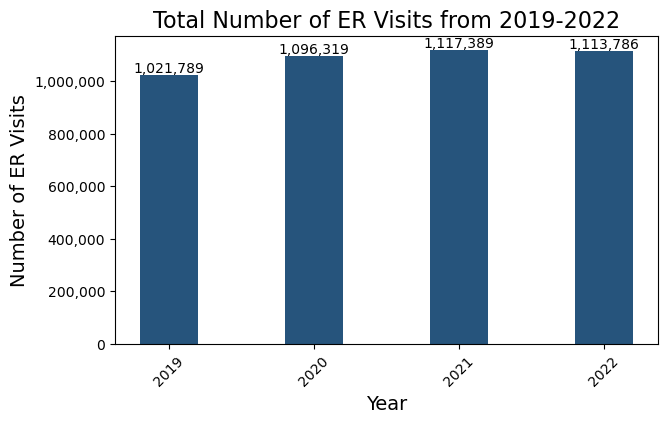

In [14]:
plt.figure(figsize = (7,4))
bars = plt.bar(year_totals.index,year_totals.values, color = '#26547C', width = 0.4)

plt.title("Total Number of ER Visits from 2019-2022", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of ER Visits", fontsize = 14)
plt.xticks(rotation = 45)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:0,.0f}'.format(x)))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.grid (False)
plt.show()

### Highlights from the data:

- We can see that ER visits increased by 74,530 from 2019 to 2020
- They peaked in 2021 at 1,117,389 visits
- Overall, we can see a significant increase ER hospitalizations in 2020 which remains high through 2022



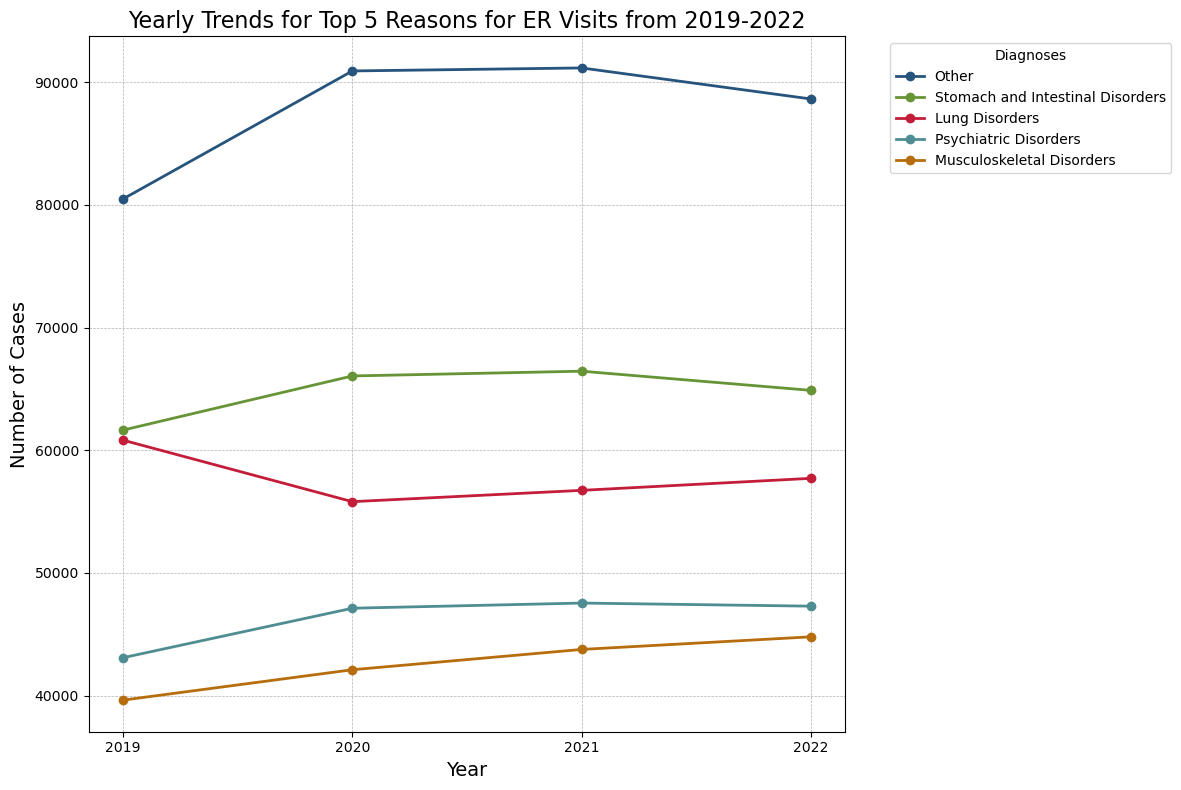

In [15]:
top_diseases = [
    'Other diseases',
    'Diseases of the stomach and intestines',
    'Diseases of lung',
    'Mental disorders',
    'Diseases of the musculoskeletal system'
]

custom_labels = {
    'Other diseases': 'Other', 'Diseases of the stomach and intestines': 'Stomach and Intestinal Disorders',
    'Diseases of lung': 'Lung Disorders', 'Mental disorders': 'Psychiatric Disorders', 
    'Diseases of the musculoskeletal system': "Musculoskeletal Disorders"
}

colors = {
    'Other diseases': '#26547C',
    'Diseases of the stomach and intestines': '#679436',
    'Diseases of lung': '#C31D39',
    'Mental disorders': '#4F8D92',
    'Diseases of the musculoskeletal system': '#B66D0D'
}

plt.figure(figsize = (12,8))

for disease in top_diseases:
    yearly_totals =[grouped_diagnoses.loc[disease, str(year)]for year in [2019, 2020, 2021, 2022]]
    plt.plot([2019, 2020, 2021, 2022], yearly_totals, marker = 'o', linestyle = '-', linewidth = 2, label = custom_labels[disease], color = colors[disease])
    
    
plt.title('Yearly Trends for Top 5 Reasons for ER Visits from 2019-2022', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks([2019, 2020, 2021, 2022])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Diagnoses', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.show()

### Highlights from the data: 

- The top 5 reasons for visiting the ER were the same for all 4 years. They were "Other", "Stomach and Intestinal Disorders", "Lung Disorders", "Psychiatric Disorders", and "Musculoskeletal Disorders"

- We see an increase in visits from 2019-2020 in all categories except "Lung Disorders", where there is a decrease

- "Other" and "Stomach and Intestinal Disorders" visits saw a slight decrease in 2022

- "Lung Disorders" and "Musculoskeletal Disorders" visits saw a slight increase in 2022

- The number of "Psychiatric Disorders" visits remained approximately at 2020 levels through 2022

## Project Focus: Psychiatric ER Visits

This chart above shows some interesting patterns including a significant increase in ER visits from 2019-2020 for 4 out of the top 5 diagnosis categories. This would naturally lead one to consider the effect of COVID-19. 

While I am interested in the impact of COVID-19 on hospital utilization in Denmark. The limitations in the data make this a difficult endeavor. Because COVID-19 was a novel condition, which also presented as a wide variety of symptoms, patients with the virus could have been categorized in a number of different diagnosis categories. 

Instead, I want to explore the ER Visits due to psychiatric disorders. We know that people reported an increase in mental distress during lockdown and in subsequent reports. I now would like to learn about these cases across genders, age groups, and location. 

I will begin by making a subset of my cleaned dataframe, so that it only contains 'Mental disorders' ER visits. 

In [16]:
psych_df = df[df['Diagnosis'] == 'Mental disorders']
psych_df.reset_index(drop = True, inplace = True)
psych_df

,Gender,Age,Region,Diagnosis,2019,2020,2021,2022
0,Men,0 years,Region Hovedstaden,Mental disorders,64.0,80.0,96.0,85.0
1,Men,0 years,Region Sjælland,Mental disorders,22.0,23.0,47.0,45.0
2,Men,0 years,Region Syddanmark,Mental disorders,23.0,27.0,23.0,26.0
3,Men,0 years,Region Midtjylland,Mental disorders,32.0,40.0,43.0,44.0
4,Men,0 years,Region Nordjylland,Mental disorders,23.0,22.0,21.0,16.0
...,...,...,...,...,...,...,...,...
185,Women,85 years and over,Region Hovedstaden,Mental disorders,247.0,267.0,259.0,291.0
186,Women,85 years and over,Region Sjælland,Mental disorders,130.0,128.0,140.0,145.0
187,Women,85 years and over,Region Syddanmark,Mental disorders,164.0,241.0,223.0,180.0
188,Women,85 years and over,Region Midtjylland,Mental disorders,89.0,114.0,112.0,140.0


# Gender

Now I want to see how these cases are divided by gender. I will group by "Gender" and then I will create a column called "Total_Visits" with the total value.

In [17]:
grouped_gender = psych_df.groupby('Gender')['2019', '2020', '2021', '2022'].sum().reset_index()
grouped_gender

,Gender,2019,2020,2021,2022
0,Men,22874.833333,24335.5,24132.0,23871.666667
1,Women,20216.333333,22790.0,23414.0,23421.333333


In [18]:
grouped_gender['Total_Visits'] = grouped_gender['2019'] + grouped_gender['2020'] + grouped_gender['2021']+ grouped_gender['2022']
grouped_gender

,Gender,2019,2020,2021,2022,Total_Visits
0,Men,22874.833333,24335.5,24132.0,23871.666667,95214.000000
1,Women,20216.333333,22790.0,23414.0,23421.333333,89841.666667


In [19]:
grouped_gender['Percentage'] = grouped_gender['Total_Visits']/grouped_gender['Total_Visits'].sum()*100
grouped_gender

,Gender,2019,2020,2021,2022,Total_Visits,Percentage
0,Men,22874.833333,24335.5,24132.0,23871.666667,95214.000000,51.451545
1,Women,20216.333333,22790.0,23414.0,23421.333333,89841.666667,48.548455


Now that I have both the totals and percentages of cases by gender, I will create a doughnut chart to visualize this in a clear way.

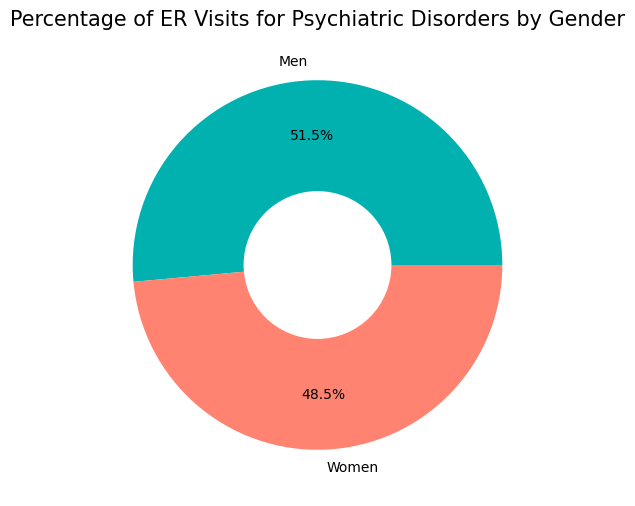

In [20]:
colors = ['#00B1B0', '#FF8370']

plt.figure(figsize = (8,6))
plt.pie(grouped_gender['Percentage'], colors = colors, labels = grouped_gender['Gender'], autopct = '%1.1f%%', pctdistance = 0.70)
plt.title ("Percentage of ER Visits for Psychiatric Disorders by Gender", fontsize = 15)

center_circle = plt.Circle ((0,0), 0.40, fc = 'white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.show()

I will now use a bar chart to visualize how these cases are distributed over time. 

In [21]:
df_psych_summary = psych_df.groupby('Gender').agg({'2019': 'sum', '2020': 'sum', '2021': 'sum', '2022': 'sum'}).reset_index()
df_psych_summary

,Gender,2019,2020,2021,2022
0,Men,22874.833333,24335.5,24132.0,23871.666667
1,Women,20216.333333,22790.0,23414.0,23421.333333


In [22]:
df_psych_melted = pd.melt(df_psych_summary, id_vars = ['Gender'], value_vars = ['2019', '2020', '2021', '2022'], var_name = 'Year', value_name = 'Cases')
df_psych_melted

,Gender,Year,Cases
0,Men,2019,22874.833333
1,Women,2019,20216.333333
2,Men,2020,24335.500000
3,Women,2020,22790.000000
4,Men,2021,24132.000000
5,Women,2021,23414.000000
6,Men,2022,23871.666667
7,Women,2022,23421.333333


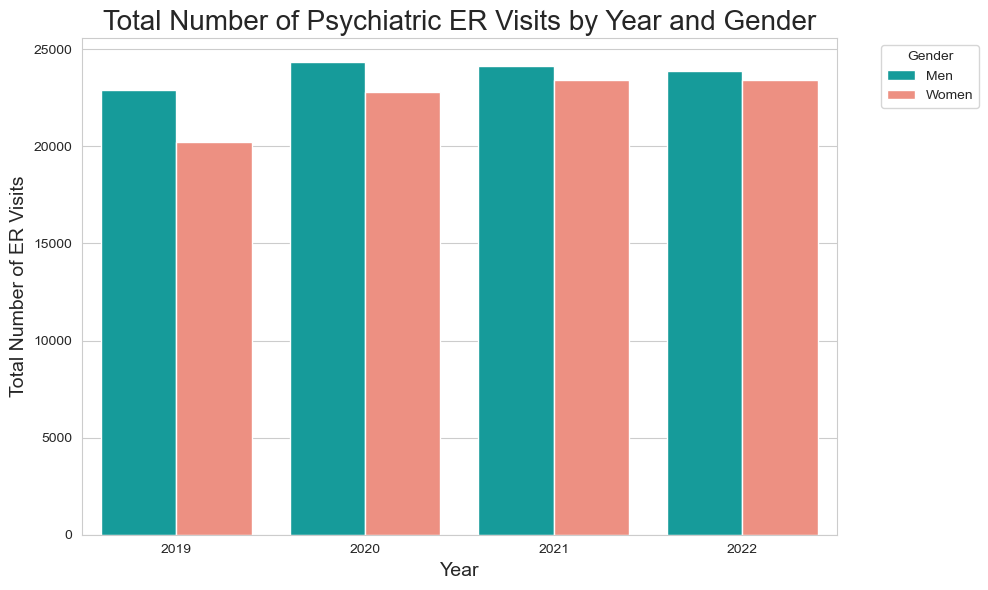

In [23]:
colors = ['#00B1B0', '#FF8370']
sns.set_style('whitegrid')

plt.figure(figsize = (10,6))
sns.barplot(data = df_psych_melted, x = 'Year', y = 'Cases', hue = 'Gender', palette = colors, ci = None)
            
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Number of ER Visits', fontsize = 14)
plt.title('Total Number of Psychiatric ER Visits by Year and Gender', fontsize = 20)

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
            
plt.tight_layout()
plt.show()

### Highlights from the data:

- Slight difference between genders in total visits with men at 51.5% and women at 48.5%

- ER Psych visits for men increased by over 1400 from 2019 to 2020 and then remained around 24,000 visits per year

- ER Psych visits for women increased by over 2500 from 2019 to 2020 and then increased over time


# Age Groups

In [24]:
psych_df['Age'].unique()

array(['0 years', '1-4 years', '5-9 years', '10-14 years', '15-19 years',
       '20-24 years', '25-29 years', '30-34 years', '35-39 years',
       '40-44 years', '45-49 years', '50-54 years', '55-59 years',
       '60-64 years', '65-69 years', '70-74 years', '75-79 years',
       '80-84 years', '85 years and over'], dtype=object)

In [25]:
grouped_age = psych_df.groupby('Age')['2019', '2020', '2021', '2022'].sum().reset_index()
grouped_age = grouped_age.reindex([0,1,10,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18])
grouped_age

,Age,2019,2020,2021,2022
0,0 years,386.000000,430.0,491.0,469.0
1,1-4 years,43.166667,41.5,41.0,41.0
10,5-9 years,39.000000,35.0,41.0,40.0
2,10-14 years,383.000000,396.0,500.0,437.0
3,15-19 years,2347.000000,2596.0,2951.0,2981.0
4,20-24 years,4152.000000,4691.0,5046.0,5145.0
5,25-29 years,4255.000000,4715.0,4693.0,4779.0
6,30-34 years,3650.000000,4208.0,4601.0,4524.0
7,35-39 years,3140.000000,3469.0,3638.0,3867.0
8,40-44 years,3780.000000,3747.0,3489.0,3429.0


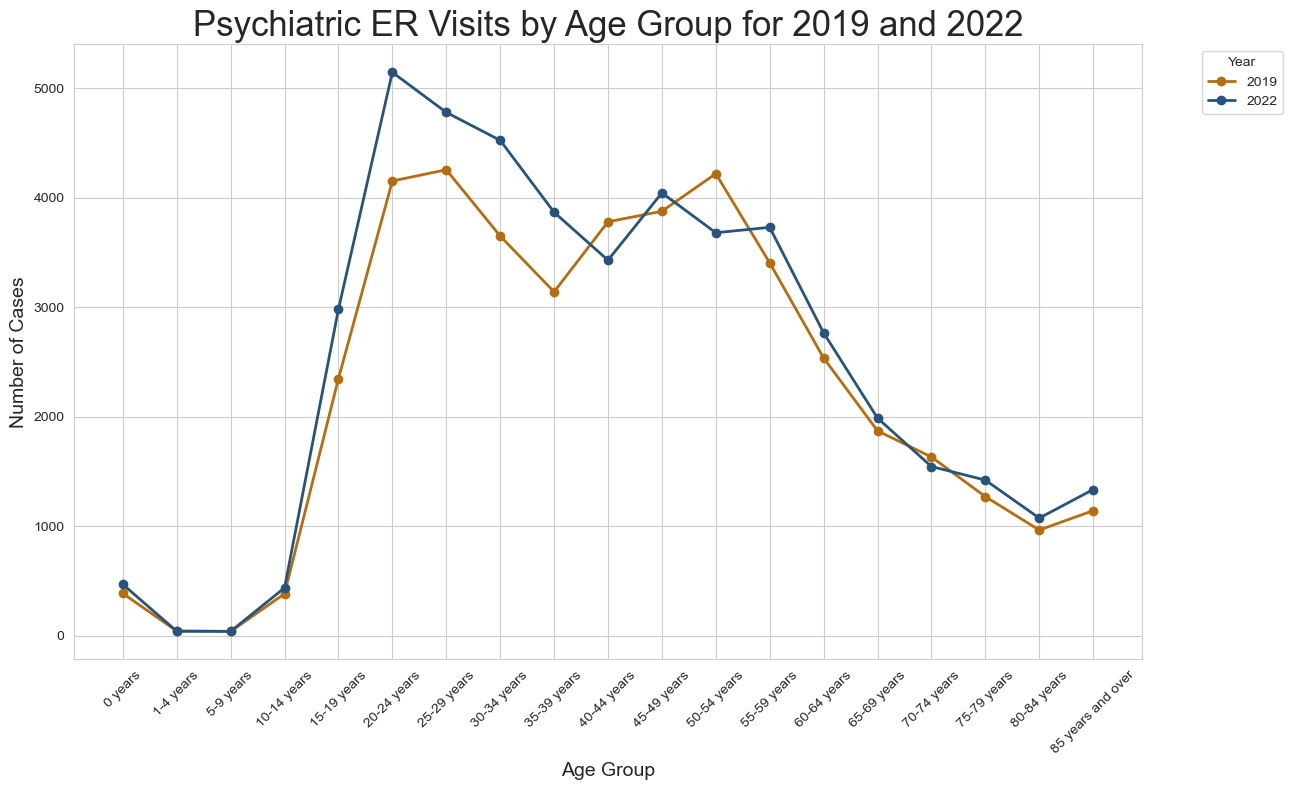

In [26]:
plt.figure(figsize = (13,8))

plt.plot(grouped_age['Age'], grouped_age['2019'], marker = 'o', linestyle = '-', linewidth = 2, label = '2019', color = '#B66D0D')
#plt.plot(grouped_age['Age'], grouped_age['2020'], marker = 'o', linestyle = '-', label = '2020', color = 'red')
#plt.plot(grouped_age['Age'], grouped_age['2021'], marker = 'o', linestyle = '-', label = '2021', color = 'purple')
plt.plot(grouped_age['Age'], grouped_age['2022'], marker = 'o', linestyle = '-', linewidth = 2, label = '2022', color = '#26547C')
    
plt.title('Psychiatric ER Visits by Age Group for 2019 and 2022', fontsize=25)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation = 45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.show()

### Highlights from the data:

- For the sake of clarity, I have shown only the earliest and latest year in the dataset 

- Significant increase in visits from the 10-14 year old to the 15-19 year old category

- Most patients coming to the ER for psychiatric disorders are 15-64 years old

- When comparing the two years, we can see an increase in visits in 2022 for those who were 15-40 years old, with the largest increase in 20-24 year old patients 

Now, let's examine the data to determine if there is a difference in when male or female patients tend to seek help. I will use the mean here, because I am interested in the overall trend and not the differences from year to year. 

In [27]:
mean_gender_age = psych_df.groupby(['Gender', 'Age']).agg(mean_2019=('2019', 'mean'), 
                                                                mean_2020=('2020', 'mean'), 
                                                                mean_2021=('2021', 'mean'), 
                                                                mean_2022=('2022', 'mean')).reset_index()

mean_gender_age['Overall Mean'] = mean_gender_age[['mean_2019', 'mean_2020', 'mean_2021', 'mean_2022']].mean (axis = 1)
mean_gender_age

,Gender,Age,mean_2019,mean_2020,mean_2021,mean_2022,Overall Mean
0,Men,0 years,32.800000,38.4,46.0,43.200000,40.100000
1,Men,1-4 years,3.566667,3.7,4.0,3.200000,3.616667
2,Men,10-14 years,20.800000,15.2,17.8,13.200000,16.750000
3,Men,15-19 years,148.000000,144.0,157.0,147.000000,149.000000
4,Men,20-24 years,335.800000,347.8,345.8,344.800000,343.550000
5,Men,25-29 years,443.800000,457.2,458.2,446.000000,451.300000
6,Men,30-34 years,422.400000,486.2,533.4,518.000000,490.000000
7,Men,35-39 years,377.800000,399.2,430.2,455.000000,415.550000
8,Men,40-44 years,458.200000,452.4,401.6,406.600000,429.700000
9,Men,45-49 years,467.800000,475.2,484.8,463.200000,472.750000


In [28]:
age_order = [
    '0 years', '1-4 years','5-9 years','10-14 years','15-19 years','20-24 years','25-29 years','30-34 years', 
    '35-39 years','40-44 years','45-49 years','50-54 years','55-59 years','60-64 years','65-69 years','70-74 years', 
    '75-79 years','80-84 years','85 years and over'
]
mean_gender_age['Age'] = pd.Categorical(mean_gender_age['Age'], categories=age_order, ordered=True)
mean_gender_age = mean_gender_age.sort_values(by='Age')
mean_gender_age


,Gender,Age,mean_2019,mean_2020,mean_2021,mean_2022,Overall Mean
0,Men,0 years,32.800000,38.4,46.0,43.200000,40.100000
19,Women,0 years,44.400000,47.6,52.2,50.600000,48.700000
1,Men,1-4 years,3.566667,3.7,4.0,3.200000,3.616667
20,Women,1-4 years,5.066667,4.6,4.2,5.000000,4.716667
29,Women,5-9 years,3.000000,2.8,3.2,3.666667,3.166667
10,Men,5-9 years,4.800000,4.2,5.0,4.333333,4.583333
2,Men,10-14 years,20.800000,15.2,17.8,13.200000,16.750000
21,Women,10-14 years,55.800000,64.0,82.2,74.200000,69.050000
3,Men,15-19 years,148.000000,144.0,157.0,147.000000,149.000000
22,Women,15-19 years,321.400000,375.2,433.2,449.200000,394.750000


In [29]:
men_df = mean_gender_age[mean_gender_age['Gender'] == 'Men'].copy()
women_df = mean_gender_age[mean_gender_age['Gender'] == 'Women'].copy()

In [30]:
print(men_df[['Age', 'Overall Mean']])
print(women_df[['Age', 'Overall Mean']])

                  Age  Overall Mean
0             0 years     40.100000
1           1-4 years      3.616667
10          5-9 years      4.583333
2         10-14 years     16.750000
3         15-19 years    149.000000
4         20-24 years    343.550000
5         25-29 years    451.300000
6         30-34 years    490.000000
7         35-39 years    415.550000
8         40-44 years    429.700000
9         45-49 years    472.750000
11        50-54 years    489.300000
12        55-59 years    442.850000
13        60-64 years    322.300000
14        65-69 years    215.500000
15        70-74 years    156.350000
16        75-79 years    126.200000
17        80-84 years     94.600000
18  85 years and over     96.700000
                  Age  Overall Mean
19            0 years     48.700000
20          1-4 years      4.716667
29          5-9 years      3.166667
21        10-14 years     69.050000
22        15-19 years    394.750000
23        20-24 years    608.150000
24        25-29 years    470

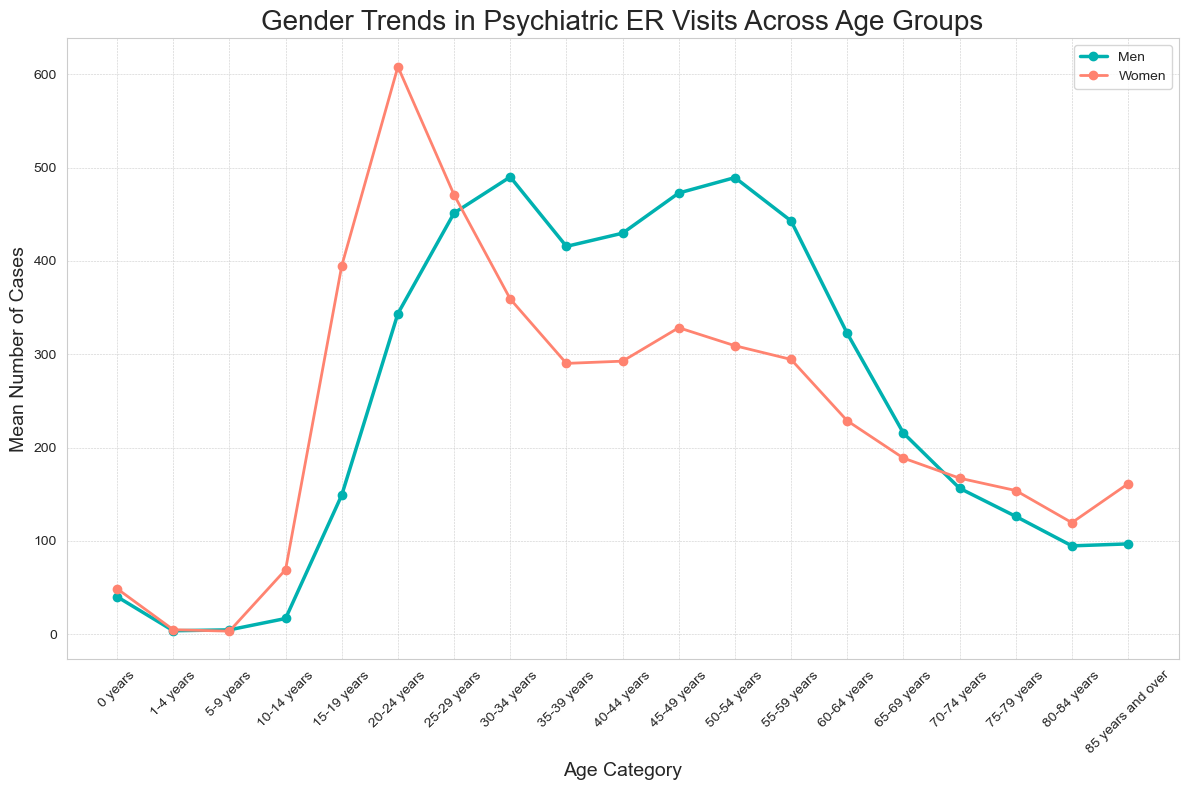

In [31]:
plt.figure(figsize = (12,8))

plt.plot(men_df['Age'], men_df['Overall Mean'], label='Men', marker='o', linestyle='-', linewidth = 2.5, color='#00B1B0')
plt.plot(women_df['Age'], women_df['Overall Mean'], label='Women', marker='o', linestyle='-', linewidth = 2, color='#FF8370')

plt.title('Gender Trends in Psychiatric ER Visits Across Age Groups', fontsize=20)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Mean Number of Cases', fontsize=14)
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth= 0.4)
plt.tight_layout()
plt.show()

### Highlights from the data:

- Here we can see that as children become teenagers they are more likely to need psychiatric care from the ER, with a significant increase from 10-14 to 15-19 for both genders

- Females have an earlier and higher peak averaging around 600 visits per year at 20-24 years old

- With men we see two later peaks at 30-34 and then again at 50-54 years old

When I examined the yearly totals by gender across age groups, there was not a significant difference in the number of male patients across the age categories from year to year. However, I did see a difference with the female patient visits. 

In [32]:
age_order = [
    '0 years', '1-4 years', '5-9 years', '10-14 years', '15-19 years',
    '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80-84 years', '85 years and over'
]

female_df = psych_df[psych_df ['Gender'] == 'Women']

female_df['Age'] = pd.Categorical(female_df['Age'], categories=age_order, ordered=True)

female_cases_by_age = female_df.groupby('Age').agg ({'2019': 'sum',
    '2020': 'sum',
    '2021': 'sum',
    '2022': 'sum'
}).reset_index()

female_cases_by_age

,Age,2019,2020,2021,2022
0,0 years,222.000000,238.0,261.0,253.000000
1,1-4 years,25.333333,23.0,21.0,25.000000
2,5-9 years,15.000000,14.0,16.0,18.333333
3,10-14 years,279.000000,320.0,411.0,371.000000
4,15-19 years,1607.000000,1876.0,2166.0,2246.000000
5,20-24 years,2473.000000,2952.0,3317.0,3421.000000
6,25-29 years,2036.000000,2429.0,2402.0,2549.000000
7,30-34 years,1538.000000,1777.0,1934.0,1934.000000
8,35-39 years,1251.000000,1473.0,1487.0,1592.000000
9,40-44 years,1489.000000,1485.0,1481.0,1396.000000


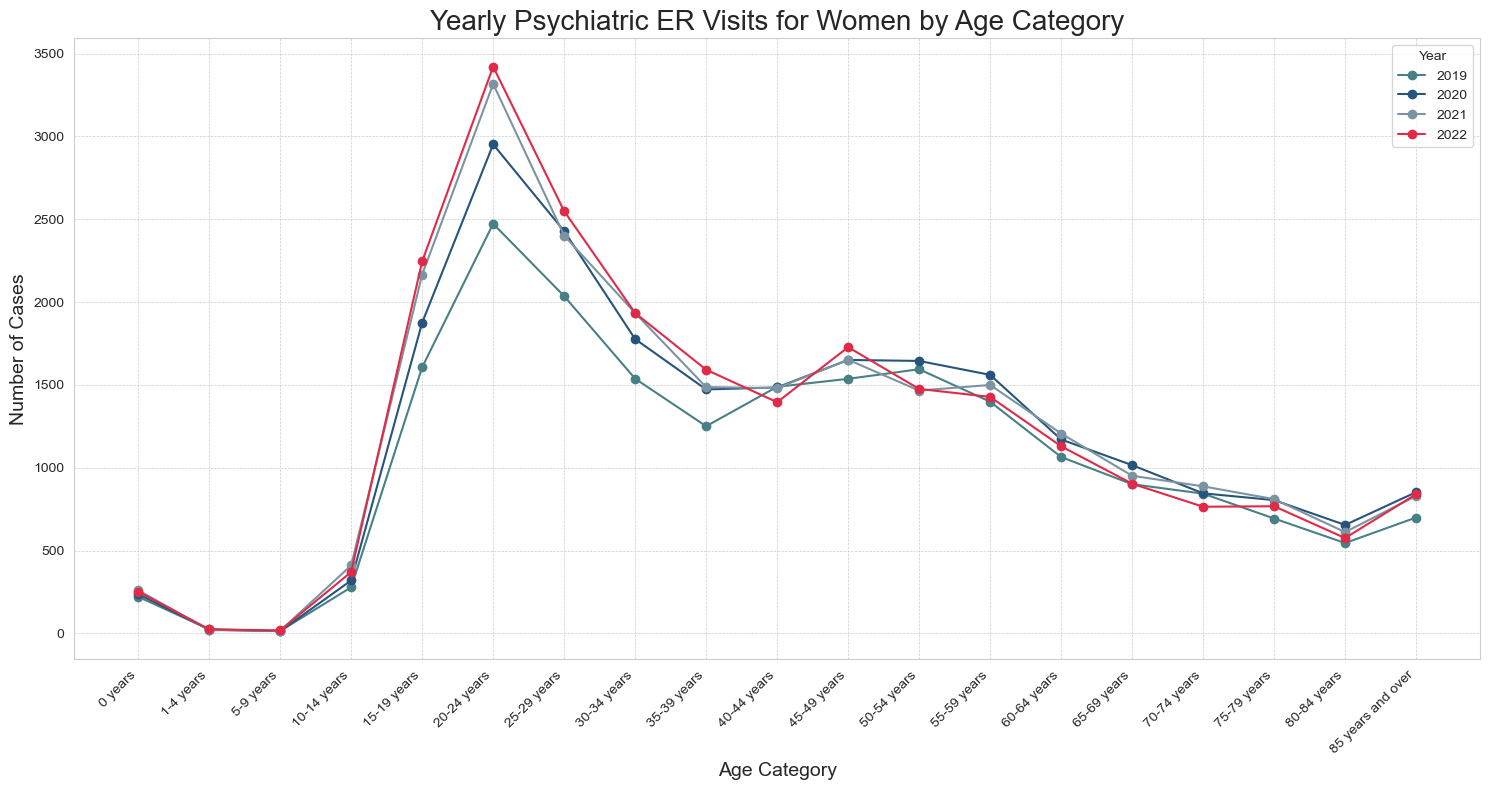

In [33]:
plt.figure(figsize = (15,8))

plt.plot(female_cases_by_age['Age'], female_cases_by_age['2019'], marker = 'o', linestyle = '-', label = '2019', color = '#478185')
plt.plot(female_cases_by_age['Age'], female_cases_by_age['2020'], marker = 'o', linestyle = '-', label = '2020', color = '#26547C')
plt.plot(female_cases_by_age['Age'], female_cases_by_age['2021'], marker = 'o', linestyle = '-', label = '2021', color = '#7C94A2')
plt.plot(female_cases_by_age['Age'], female_cases_by_age['2022'], marker = 'o', linestyle = '-', label = '2022', color = '#DF2A48')

plt.title('Yearly Psychiatric ER Visits for Women by Age Category', fontsize=20)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, ha="right") 
plt.legend(title='Year')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### Highlights from the data:

- Here we can see that for most age categories, there was not much difference between the years 2019-2022

- However, we can see that for females from 15-34 years old the peak of ER visits gets progressively higher with each year. 

- ER visits from 20-24 year old females had a significant increase over time with total visits increasing by almost 1000 from 2019 to 2022. 

## Region

In order to determine if there is a difference in ER psychiatric visits in the various regions, I will use the "Region" data in my dataset and also population data to determine the rate of cases per 100,000 residents. 

In [34]:
reg_totals = psych_df.groupby('Region')['2019', '2020', '2021', '2022'].sum().reset_index()
reg_totals

,Region,2019,2020,2021,2022
0,Region Hovedstaden,15232.000000,16109.0,15919.0,16100.000000
1,Region Midtjylland,8727.333333,9961.0,10181.0,10435.666667
2,Region Nordjylland,3231.500000,3770.5,3744.0,3743.000000
3,Region Sjælland,6464.333333,6971.0,7543.0,7461.333333
4,Region Syddanmark,9436.000000,10314.0,10159.0,9553.000000


In [35]:
pop_df = pd.read_csv('DK_pop_2019-2022.csv', encoding = 'latin1', usecols = [' ','2019_Total','2020_Total', '2021_Total', '2022_Total'])
pop_df

,,2019_Total,2020_Total,2021_Total,2022_Total
0,Region Hovedstaden,7364566,7394755,7435016,7509202
1,Region SjÃ¦lland,3347857,3350547,3362819,3386355
2,Region Syddanmark,4894806,4892814,4899567,4930901
3,Region Midtjylland,5292518,5311830,5340703,5396719
4,Region Nordjylland,2359671,2360224,2362888,2372746


In [36]:
pop_df.rename(columns = {' ':'Region'}, inplace = True) 
pop_df

,Region,2019_Total,2020_Total,2021_Total,2022_Total
0,Region Hovedstaden,7364566,7394755,7435016,7509202
1,Region SjÃ¦lland,3347857,3350547,3362819,3386355
2,Region Syddanmark,4894806,4892814,4899567,4930901
3,Region Midtjylland,5292518,5311830,5340703,5396719
4,Region Nordjylland,2359671,2360224,2362888,2372746


In [37]:
pop_df['Region'] = pop_df['Region'].replace('Region SjÃ¦lland','Region Sjælland')
pop_df

,Region,2019_Total,2020_Total,2021_Total,2022_Total
0,Region Hovedstaden,7364566,7394755,7435016,7509202
1,Region Sjælland,3347857,3350547,3362819,3386355
2,Region Syddanmark,4894806,4892814,4899567,4930901
3,Region Midtjylland,5292518,5311830,5340703,5396719
4,Region Nordjylland,2359671,2360224,2362888,2372746


In [38]:
rate_df = pd.merge(reg_totals, pop_df)
rate_df

,Region,2019,2020,2021,2022,2019_Total,2020_Total,2021_Total,2022_Total
0,Region Hovedstaden,15232.000000,16109.0,15919.0,16100.000000,7364566,7394755,7435016,7509202
1,Region Midtjylland,8727.333333,9961.0,10181.0,10435.666667,5292518,5311830,5340703,5396719
2,Region Nordjylland,3231.500000,3770.5,3744.0,3743.000000,2359671,2360224,2362888,2372746
3,Region Sjælland,6464.333333,6971.0,7543.0,7461.333333,3347857,3350547,3362819,3386355
4,Region Syddanmark,9436.000000,10314.0,10159.0,9553.000000,4894806,4892814,4899567,4930901


In [39]:
rate_df.rename(columns = {'2019': '2019_Visits', '2020': '2020_Visits', '2021': '2021_Visits', '2022': '2022_Visits'}, inplace = True)
rate_df

,Region,2019_Visits,2020_Visits,2021_Visits,2022_Visits,2019_Total,2020_Total,2021_Total,2022_Total
0,Region Hovedstaden,15232.000000,16109.0,15919.0,16100.000000,7364566,7394755,7435016,7509202
1,Region Midtjylland,8727.333333,9961.0,10181.0,10435.666667,5292518,5311830,5340703,5396719
2,Region Nordjylland,3231.500000,3770.5,3744.0,3743.000000,2359671,2360224,2362888,2372746
3,Region Sjælland,6464.333333,6971.0,7543.0,7461.333333,3347857,3350547,3362819,3386355
4,Region Syddanmark,9436.000000,10314.0,10159.0,9553.000000,4894806,4892814,4899567,4930901


In [40]:
rate_df['Incidence_2019'] = (rate_df['2019_Visits']/rate_df['2019_Total']) * 100000
rate_df['Incidence_2020'] = (rate_df['2020_Visits']/rate_df['2020_Total']) * 100000
rate_df['Incidence_2021'] = (rate_df['2021_Visits']/rate_df['2021_Total']) * 100000
rate_df['Incidence_2022'] = (rate_df['2022_Visits']/rate_df['2022_Total']) * 100000
rate_df

,Region,2019_Visits,2020_Visits,2021_Visits,2022_Visits,2019_Total,2020_Total,2021_Total,2022_Total,Incidence_2019,Incidence_2020,Incidence_2021,Incidence_2022
0,Region Hovedstaden,15232.000000,16109.0,15919.0,16100.000000,7364566,7394755,7435016,7509202,206.828210,217.843593,214.108483,214.403608
1,Region Midtjylland,8727.333333,9961.0,10181.0,10435.666667,5292518,5311830,5340703,5396719,164.899455,187.524827,190.630335,193.370577
2,Region Nordjylland,3231.500000,3770.5,3744.0,3743.000000,2359671,2360224,2362888,2372746,136.947057,159.751786,158.450168,157.749713
3,Region Sjælland,6464.333333,6971.0,7543.0,7461.333333,3347857,3350547,3362819,3386355,193.088693,208.055580,224.305858,220.335238
4,Region Syddanmark,9436.000000,10314.0,10159.0,9553.000000,4894806,4892814,4899567,4930901,192.775771,210.798939,207.344853,193.737412


In [41]:
rate_df

,Region,2019_Visits,2020_Visits,2021_Visits,2022_Visits,2019_Total,2020_Total,2021_Total,2022_Total,Incidence_2019,Incidence_2020,Incidence_2021,Incidence_2022
0,Region Hovedstaden,15232.000000,16109.0,15919.0,16100.000000,7364566,7394755,7435016,7509202,206.828210,217.843593,214.108483,214.403608
1,Region Midtjylland,8727.333333,9961.0,10181.0,10435.666667,5292518,5311830,5340703,5396719,164.899455,187.524827,190.630335,193.370577
2,Region Nordjylland,3231.500000,3770.5,3744.0,3743.000000,2359671,2360224,2362888,2372746,136.947057,159.751786,158.450168,157.749713
3,Region Sjælland,6464.333333,6971.0,7543.0,7461.333333,3347857,3350547,3362819,3386355,193.088693,208.055580,224.305858,220.335238
4,Region Syddanmark,9436.000000,10314.0,10159.0,9553.000000,4894806,4892814,4899567,4930901,192.775771,210.798939,207.344853,193.737412


In [42]:
rate_df.set_index('Region', inplace = True)

In [43]:
incidence_df = rate_df.filter(regex = 'Incidence')
incidence_df

,Incidence_2019,Incidence_2020,Incidence_2021,Incidence_2022
Region,,,,
Region Hovedstaden,206.828210,217.843593,214.108483,214.403608
Region Midtjylland,164.899455,187.524827,190.630335,193.370577
Region Nordjylland,136.947057,159.751786,158.450168,157.749713
Region Sjælland,193.088693,208.055580,224.305858,220.335238
Region Syddanmark,192.775771,210.798939,207.344853,193.737412


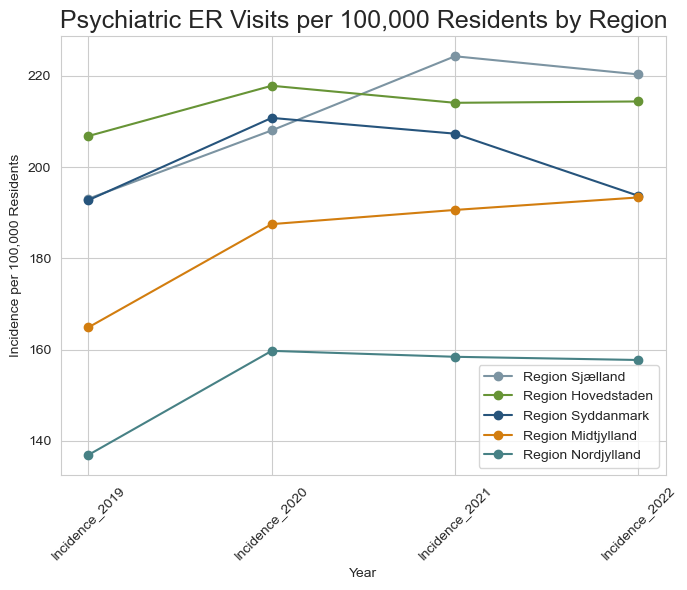

In [44]:
plt.figure(figsize = (7,6))

plt.plot(incidence_df.columns, incidence_df.loc['Region Sjælland'], marker='o', linestyle='-', color = '#7C94A2', label='Region Sjælland')
plt.plot(incidence_df.columns, incidence_df.loc['Region Hovedstaden'], marker='o', linestyle='-', color = '#679436', label='Region Hovedstaden')
plt.plot(incidence_df.columns, incidence_df.loc['Region Syddanmark'], marker='o', linestyle='-', color = '#26547C', label='Region Syddanmark')
plt.plot(incidence_df.columns, incidence_df.loc['Region Midtjylland'], marker='o', linestyle='-', color = '#D27D0F', label='Region Midtjylland')
plt.plot(incidence_df.columns, incidence_df.loc['Region Nordjylland'], marker='o', linestyle='-', color = '#478185', label='Region Nordjylland')




plt.title('Psychiatric ER Visits per 100,000 Residents by Region', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Incidence per 100,000 Residents')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Highlights from the Data:

- The rates of psychiatric ER visits increased in every region from 2019-2020
- Most regions remained at the increased levels, with two noteable exceptions -- Region Sjælland and Region Syddanmark
- Region Sjælland saw a dramatic further increase from 2020-2021
- Region Syddanmark saw a significant decrease from 2021-2022

In [80]:
filtered_df = psych_df[(psych_df['Gender'] == 'Women') & (psych_df['Age'].str.contains('10-14|15-19|20-24|25-29|30-34|35-39'))]
grouped_df = filtered_df.groupby(['Age', 'Region']).sum().reset_index()

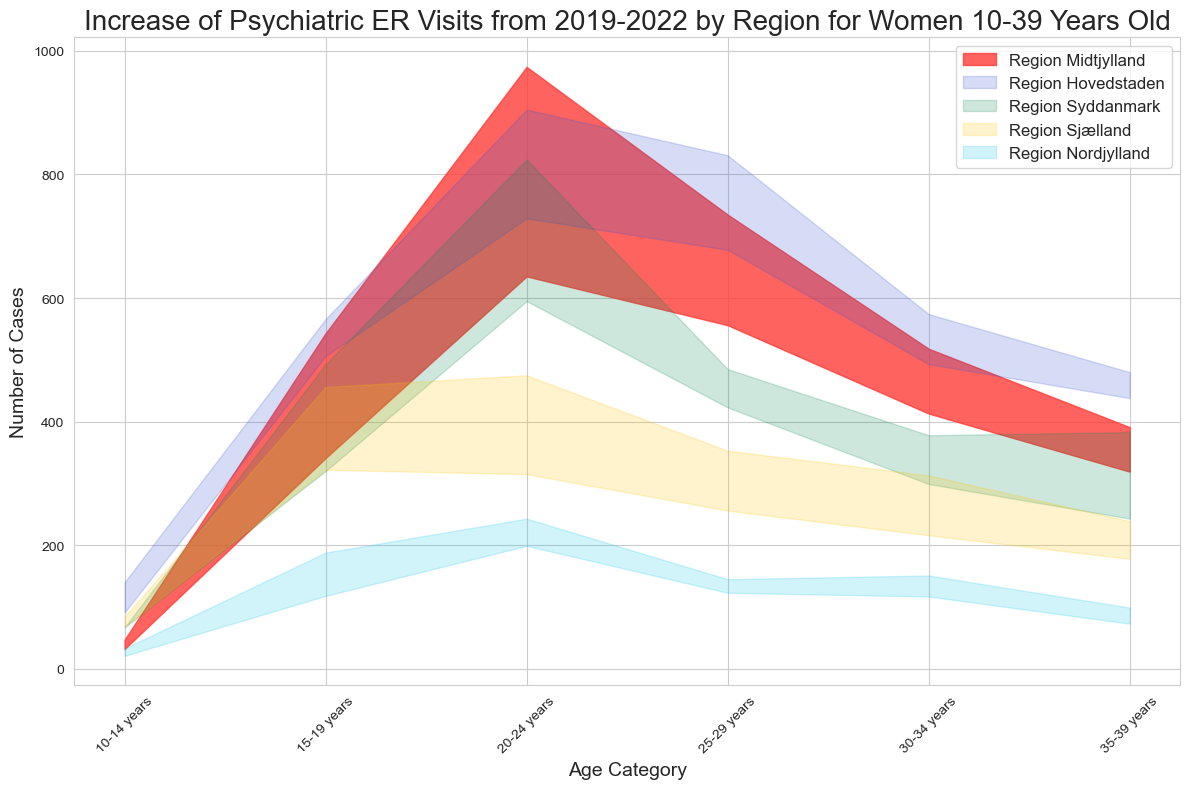

In [109]:
plt.figure(figsize=(12, 8))

region_styles = {
    'Region Midtjylland': {'color': '#FF3C38', 'alpha': 0.8},  # Darker
    'Region Hovedstaden': {'color': '#3454D1', 'alpha': 0.2},
    'Region Syddanmark': {'color': '#0A8754', 'alpha': 0.2},
    'Region Sjælland': {'color': '#FEC601', 'alpha': 0.2}, 
    'Region Nordjylland': {'color': '#1AC8ED', 'alpha': 0.2}
}


# Plot each region and year separately
for region in region_styles.keys():
    region_data = grouped_df[grouped_df['Region'] == region]
    plt.fill_between(region_data['Age'], region_data['2019'], 
                     region_data['2022'], 
                     label=f'{region}', color=region_styles[region]['color'], alpha=region_styles[region]['alpha'])

plt.xlabel('Age Category', fontsize = 14)
plt.ylabel('Number of Cases', fontsize = 14)
plt.title('Increase of Psychiatric ER Visits from 2019-2022 by Region for Women 10-39 Years Old', fontsize = 20)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Highlights from the Data:

- With limited resources, it is important to know where to increase support services to help this critical patient population. By examining the amount of increase, we can locate areas of concern. Here, we can see that while females from age 10-39 are at greater risk than male patients or patients of other ages, those in Midtjylland have experienced the largest increase in the peak age range (20-24 years old) and in several other age categories. 

## Conclusion

In this project, I have examined Emergency Room Visit data across Denmark from 2019-2022. I began by looking at overall trends in hospitalizations and then narrowed my focus to the top diagnoses. Because of the potential disruption in the data from the introduction of a novel virus, COVID-19, I chose to look at psychiatric ER visits, the fourth most common reason for ER hospitalization. I examined these cases based on gender and found that female hospitalizations skewed younger than male hospitalizations, with their peak reaching about 100 more visits than male patients at their peak. Concerningly, the psychiatric hospitalization of young females has increased over time, with the largest overall increase occurring in the Midtjylland Region. This analysis can help guide precious mental health resources to support those most in need of preventative care. 